#### Calculate Semantic Similarity

In [1]:
# Access files and folders within the Google Drive
from google.colab import drive
drive.mount('/content/drive')

from google.colab import userdata
userdata.get('HF_TOKEN')

# Set up the current working directory within the Google Drive
%cd /content/drive/My\ Drive/Colab\ Notebooks/LLM/teacher_standard

# Set up the current working directory within G Drive (Desktop)
# %cd "G:/My Drive/Colab Notebooks/LLM/teacher_standard"

Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks/LLM/teacher_standard


In [ ]:
!pip install sentence_transformers
!pip install --upgrade huggingface_hub
# !pip install nbconvert

In [33]:
import warnings
import pandas as pd
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import plotly.graph_objects as go
from matplotlib import cm
from plotly.offline import plot

warnings.filterwarnings('ignore')

df = pd.read_excel("standard_items.xlsx")

model = SentenceTransformer('all-MiniLM-L6-v2')

combined_texts = df['item'].tolist()

embeddings = model.encode(combined_texts)

similarity_matrix = cosine_similarity(embeddings)
similarity_df = pd.DataFrame(similarity_matrix, index=df['id'], columns=df['id'])

<Axes: xlabel='id', ylabel='id'>

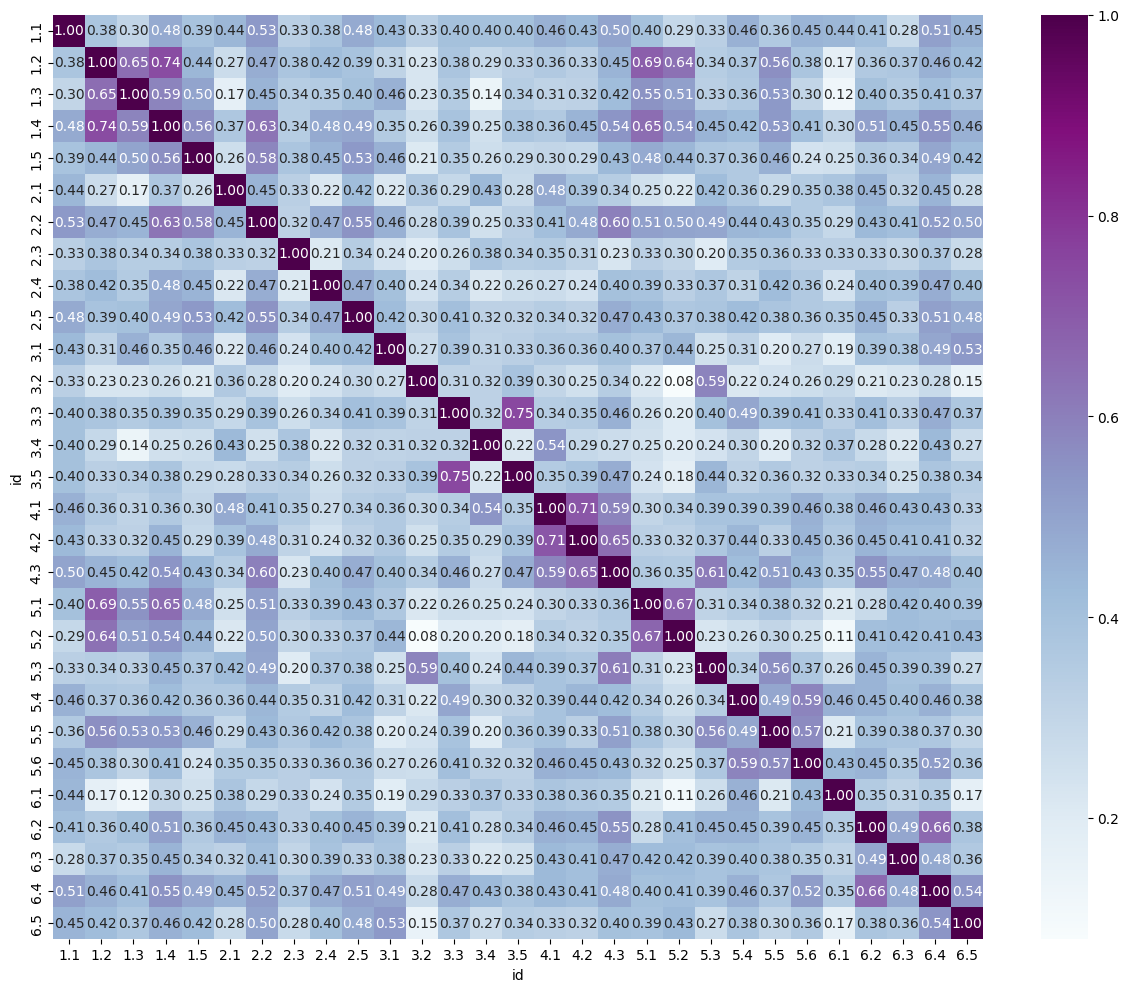

In [40]:
similarity_df_clean = similarity_df.round(2)

plt.figure(figsize=(15, 12))
sns.heatmap(similarity_df_clean, cmap="BuPu", annot=True, fmt=".2f")
plt.show()

In [43]:
from nbconvert import HTMLExporter
import nbformat

notebook_path = 'Python.ipynb'
html_exporter = HTMLExporter()

with open(notebook_path, 'r', encoding='utf-8') as nb_file:
    notebook_content = nb_file.read()
    notebook = nbformat.reads(notebook_content, as_version=4)

html_output, _ = html_exporter.from_notebook_node(notebook)

with open('Python.html', 'w', encoding='utf-8') as html_file:
    html_file.write(html_output)